In [1]:
import urllib
import requests
import webbrowser
import datetime
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, ImageColorGenerator

from bs4 import BeautifulSoup

In [ ]:
# nltk.download()

In [2]:
sia = SentimentIntensityAnalyzer()

In [3]:
text = 'mausam-indian-curry-n-bites-clifton'
text2 = 'the-hive-bar-and-bistro-garfield?start=20'
text = urllib.parse.quote_plus(text)
print(text)

mausam-indian-curry-n-bites-clifton


In [4]:
page = 'https://www.yelp.com/biz/' + text
print(page)

page = 'https://www.yelp.com/biz/' + text + '?start=' + str(20)
print(page)

https://www.yelp.com/biz/mausam-indian-curry-n-bites-clifton
https://www.yelp.com/biz/mausam-indian-curry-n-bites-clifton?start=20


In [5]:
response = requests.get(page)
soup = BeautifulSoup(response.text, 'html.parser')
print(soup)

<!DOCTYPE HTML>

<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!--> <html class="no-js" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml"> <!--<![endif]-->
<head>
<script>
            (function() {
                var main = null;

                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(j&&!h){document.body.inne

In [6]:
reviews = ""
for i in soup.find_all(itemprop= 'description'):
    reviews += i.text
print(reviews)

I've been having such an craving for curry, and this place definitely satisfied it. My friend found this place that came highly recommended as per Yelp, and I can see why!

We ventured in on a Friday evening for dinner, and the place was pretty empty with only one other table being occupied. It is tucked on a small cute street, with a big lot for parking. Initially, when we walked in, we kind of just stood there, no one greeted us and we actually thought they were closed. However, the is only one hostess who also doubles as the waiter, and also manages the takeout. 

They offer a wide variety of different BYOB (Built Your Own Bowl ((Curries, Biryanis, Burritos)), or they have a set list of items they recommend. 

We started off with the vegetable samosas, which were delicious! It was crispy, fulled with many different types of veggies (Potatoes, carrots, peas, etc) and tons of flavor. It definitely had a kick to it, not overly spicy, but not mild either FYI. It came with two chutneys, 

In [7]:
for i in soup.find_all(itemprop= 'description'):
    print(i.text)

I've been having such an craving for curry, and this place definitely satisfied it. My friend found this place that came highly recommended as per Yelp, and I can see why!

We ventured in on a Friday evening for dinner, and the place was pretty empty with only one other table being occupied. It is tucked on a small cute street, with a big lot for parking. Initially, when we walked in, we kind of just stood there, no one greeted us and we actually thought they were closed. However, the is only one hostess who also doubles as the waiter, and also manages the takeout. 

They offer a wide variety of different BYOB (Built Your Own Bowl ((Curries, Biryanis, Burritos)), or they have a set list of items they recommend. 

We started off with the vegetable samosas, which were delicious! It was crispy, fulled with many different types of veggies (Potatoes, carrots, peas, etc) and tons of flavor. It definitely had a kick to it, not overly spicy, but not mild either FYI. It came with two chutneys, 

In [9]:
sentiment_score = sia.polarity_scores(reviews)
print(sentiment_score)

{'neg': 0.045, 'neu': 0.734, 'pos': 0.222, 'compound': 0.9999}


In [100]:
page_num = soup.find_all(class_= "available-number pagination-links_anchor")
# print(page_num)
# print(len(page_num))

counter = 0
reviews = ""
page = 'https://www.yelp.com/biz/' + text
response = requests.get(page)
soup = BeautifulSoup(response.text, 'html.parser')

for i in range (len(page_num) + 1):
    response = requests.get(page)
    soup = BeautifulSoup(response.text, 'html.parser')
    for i in soup.find_all(itemprop= 'description'):
        reviews += i.text
    counter += 20
    page = 'https://www.yelp.com/biz/' + text + '?start=' + str(counter)

In [12]:
print(reviews)

I've been having such an craving for curry, and this place definitely satisfied it. My friend found this place that came highly recommended as per Yelp, and I can see why!

We ventured in on a Friday evening for dinner, and the place was pretty empty with only one other table being occupied. It is tucked on a small cute street, with a big lot for parking. Initially, when we walked in, we kind of just stood there, no one greeted us and we actually thought they were closed. However, the is only one hostess who also doubles as the waiter, and also manages the takeout. 

They offer a wide variety of different BYOB (Built Your Own Bowl ((Curries, Biryanis, Burritos)), or they have a set list of items they recommend. 

We started off with the vegetable samosas, which were delicious! It was crispy, fulled with many different types of veggies (Potatoes, carrots, peas, etc) and tons of flavor. It definitely had a kick to it, not overly spicy, but not mild either FYI. It came with two chutneys, 

In [7]:
file = "D:/David/Data/Yelp/hive_manual.txt"
f = open(file, 'rt')
txt = f.read()
f.close()

In [10]:
file = "D:/David/Data/Sentiment/StopWords_GenericLong.txt"
f = open(file, encoding = 'utf-8-sig')
s_words = f.read()
f.close()

In [11]:
stop_words = set(stopwords.words('english'))

In [13]:
words = reviews.split()
words = [word.upper() for word in words]
stopwords = s_words.split()
stopwords = [stopwords.upper() for stopwords in stopwords]
ns_words = [w for w in words if w not in stopwords]
ans_words = []

for w in ns_words:
    if not w.isalpha():
        continue
    ans_words.append(w)
    
f_dist = nltk.FreqDist(ans_words)
print(f_dist)
print(f_dist.most_common(50))

<FreqDist with 420 samples and 713 outcomes>
[('PLACE', 18), ('INDIAN', 17), ('FOOD', 16), ('CHICKEN', 15), ('TIME', 8), ('ORDERED', 7), ('TIKKA', 7), ('PANEER', 7), ('GREAT', 7), ('SERVICE', 7), ('MASALA', 6), ('FREE', 6), ('MANGO', 6), ('BACK', 6), ('SPICY', 6), ('TASTE', 5), ('SUPER', 5), ('SPOT', 5), ('HOT', 5), ('FRIEND', 4), ('MILD', 4), ('SPICE', 4), ('CHECK', 4), ('BIT', 4), ('NAAN', 4), ('GARLIC', 4), ('ORDERING', 4), ('YELP', 4), ('ASKED', 4), ('AREA', 4), ('REVIEW', 4), ('EAT', 4), ('SAUCE', 4), ('SMALL', 3), ('CUTE', 3), ('BIG', 3), ('LOT', 3), ('KIND', 3), ('THOUGHT', 3), ('SWEET', 3), ('HAPPY', 3), ('PALAK', 3), ('DELICIOUS', 3), ('CLIFTON', 3), ('PARKING', 3), ('LAMB', 3), ('MEDIUM', 3), ('WRITE', 3), ('ATE', 3), ('BUTTER', 3)]


In [16]:
mask = np.array(Image.open("D:/David/Downloads/mausam.png"))

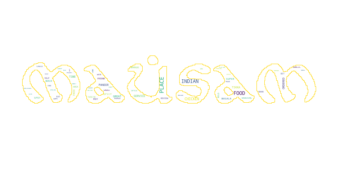

In [17]:
wordcloud = WordCloud(background_color="white",
                      mask = mask,
                      width = 1200,
                      height = 1700,
                      contour_width = .2, 
                      contour_color ='gold',
                      max_words = 200, ).generate_from_frequencies(f_dist)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
wordcloud.to_file("D:/David/Pictures/mausam.jpg")